![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE A WORDCLOUD FROM A SHAREHOLDER LETTER?**

## **Wordcloud**

<font size="3"> WordCloud is one of the most powerful and straightforward visualization methods when it comes to text data. The size of words are dependent on the occurrence frequency (text’s importance in the context), therefore it comes in handy for Natural Language Processing machine learning projects or text analysis. In this Notebook, we will show how to create a WordCloud in Python from earnings reports. Please take a look at our <a href="https://quant-trading.co/how-to-download-data-from-sec-edgar-api/" target="_blank">notebook</a> where we explained how to download data from the SEC EDGAR API. 
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import requests
import bs4 as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Get the information from SEC EDGAR API**

   
<font size="3"> First, we are going to download the information from EDGAR. We will look for all the fillings and extract the information from the URL to search for it on the SEC's website. In this case we are going to look for all the companies' fillings for the 4th quarter of 2023. They are contained in a file known as "master.idx" <br><br>

In [4]:
headers = { 'User-Agent': 'Mozilla/5.0', } 

year = 2023
quarter = 'QTR4'

#get name of all filings 
download = requests.get(f'https://www.sec.gov/Archives/edgar/full-index/{year}/{quarter}/master.idx', stream=True, headers = headers).content
download = download.decode("utf-8").split('\n')  #This is a file containing all the companies' fillings for the 4th quarter of 2023
download[1520:1540]

['1002047|NetApp, Inc.|4|2023-11-17|edgar/data/1002047/0001209191-23-055689.txt',
 '1002047|NetApp, Inc.|4|2023-11-17|edgar/data/1002047/0001209191-23-055690.txt',
 '1002047|NetApp, Inc.|4|2023-11-17|edgar/data/1002047/0001209191-23-055691.txt',
 '1002047|NetApp, Inc.|4|2023-11-17|edgar/data/1002047/0001209191-23-055692.txt',
 '1002047|NetApp, Inc.|4|2023-11-17|edgar/data/1002047/0001209191-23-055693.txt',
 '1002047|NetApp, Inc.|4|2023-11-21|edgar/data/1002047/0001209191-23-056208.txt',
 '1002047|NetApp, Inc.|4|2023-12-13|edgar/data/1002047/0001209191-23-058497.txt',
 '1002047|NetApp, Inc.|8-K|2023-11-16|edgar/data/1002047/0000950170-23-064506.txt',
 '1002047|NetApp, Inc.|8-K|2023-11-28|edgar/data/1002047/0000950170-23-066400.txt',
 '1002152|COMPASS CAPITAL MANAGEMENT, INC|13F-HR|2023-10-30|edgar/data/1002152/0001085146-23-003979.txt',
 '1002242|ENI SPA|6-K|2023-10-04|edgar/data/1002242/0001174947-23-001185.txt',
 '1002242|ENI SPA|6-K|2023-10-11|edgar/data/1002242/0001104659-23-108566.

## **Get the URL**

   
<font size="3"> Now we are going to build the exact URL for the company's report. In this case we are going to find the 8-k report for Netflix. <br><br>

In [5]:
company = 'NETFLIX INC'
filing = '8-K'

#build the first part of the url
for item in download:
  #company name and report type
  if (company in item) and (filing in item):     
    company = item
    company = company.strip()
    splitted_company = company.split('|')
    url = splitted_company[-1]

#build the second part of the url
url2 = url.split('-') 
url2 = url2[0] + url2[1] + url2[2]
url2 = url2.split('.txt')[0]

to_get_html_site = 'https://www.sec.gov/Archives/' + url
data = requests.get(to_get_html_site, stream=True, headers = headers).content
data = data.decode("utf-8") 
data = data.split('FILENAME>')
data = data[1].split('\n')[0]
url_to_use = 'https://www.sec.gov/Archives/'+ url2 + '/'+data
print(url_to_use)

https://www.sec.gov/Archives/edgar/data/1065280/000106528023000272/nflx-20231018.htm


## **Parse the text using beautiful soup**

   
<font size="3"> Beautiful Soup is a Python library for pulling data out of HTML and XML files. It creates a parse tree for documents that can be used to extract data from HTML, which is useful for web scraping. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. Below, we show an example of the information that you get from BeautilSoup.
<br><br>

In [6]:
url_to_use = 'https://www.sec.gov/Archives/edgar/data/1065280/000106528023000272/ex991_q323.htm'

resp = requests.get(url_to_use, stream=True, headers = headers)
soup = bs.BeautifulSoup(resp.text, 'html.parser')

print(soup.prettify())

<document>
 <type>
  EX-99.1
  <sequence>
   2
   <filename>
    ex991_q323.htm
    <description>
     EX-99.1
     <text>
      <html>
       <head>
        <!-- Document created using Wdesk -->
        <!-- Copyright 2023 Workiva -->
        <title>
         Document
        </title>
        <script>
         bazadebezolkohpepadr="25247634"
        </script>
        <script defer="" src="https://www.sec.gov/akam/13/1813e60" type="text/javascript">
        </script>
       </head>
       <body>
        <div id="i8b16c927cc9a45bfac995b32089c9bac_1">
        </div>
        <div style="min-height:13.5pt;width:100%">
         <div>
          <font>
           <br/>
          </font>
         </div>
        </div>
        <div style="margin-bottom:5pt;margin-top:5pt;text-align:right">
         <font style="color:#000000;font-family:'Calibri',sans-serif;font-size:10pt;font-weight:400;line-height:120%">
          Exhibit 99.1
         </font>
        </div>
        <div>
         <font style

## **Find the elements of the document**

   
<font size="3"> One of the important pieces of element in any piece of HTML document are tags, which may contain other tags/strings (tag's children). Beautiful Soup provides different ways to navigate and iterate over's tag's children. Easiest way to search a parse tree is to search the tag by its name. Below, we show an example on how to search the different tags on the html document.
<br><br>

In [7]:
# One possible solution
tag_list = []
for tag in soup.find_all():
    tag_list.append(tag.name)
tag_count_dict = {}
for tag_name in tag_list:
    if tag_name in tag_count_dict:
        tag_count_dict[tag_name] = tag_count_dict[tag_name] + 1
    else:
        tag_count_dict[tag_name] = 1
tag_count_dict

{'document': 1,
 'type': 1,
 'sequence': 1,
 'filename': 1,
 'description': 1,
 'text': 1,
 'html': 1,
 'head': 1,
 'title': 1,
 'script': 2,
 'body': 1,
 'div': 383,
 'font': 1314,
 'br': 172,
 'table': 23,
 'tr': 204,
 'td': 2099,
 'img': 20,
 'hr': 15,
 'noscript': 1}

## **Find the text of the body**

   
<font size="3"> The html file we are working with has 1 body tag. It normally contains the text, which in this case, is the earnings report. You can observe how to extract the text using the function get_text
<br><br>

In [8]:
data = '' 
for data in soup.find_all("body"): 
    print(data.get_text()[0:1000])

Exhibit 99.1 October 18, 2023Fellow shareholders,Summary:•Our Q3 financials were in-line with to ahead of forecast with revenue of $8.5B, paid net adds of 9M and operating margin of 22.4%. We now expect operating margin1 of 20% for FY23 (the high end of our 18% to 20% range).•We now expect FY23 free cash flow of ~$6.5B, up from our prior forecast of at least $5B. We repurchased $2.5B of shares in Q3 and increased our buyback authorization by $10B.•We continue to focus on improving our slate, with best-in-class originals and licensed titles from around the world. In Q3, these included English language hits like One Piece S1, The Witcher S3, Top Boy S3, Sex Education S4, Love at First Sight and Suits, and local language wins with Dear Child (Germany), Sintonia S4 (Brazil), Guns & Gulaabs S1 (India) and Class Act (France).•Adoption of our ads plan continues to grow — with ads plan membership up almost 70% quarter-over-quarter — and 30% of sign ups in our ads countries are, on average, to 

## **Plot the WordCloud**

   
<font size="3"> The last part is to plot the WordCloud as follows:
<br><br>

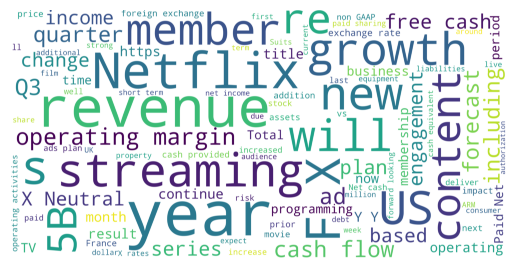

In [9]:
word_cloud_text = data.get_text()
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)